In [1]:
# tabular manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns

# sklearn for scaling and clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

# environment
from env import get_db_url

import warnings
warnings.filterwarnings("ignore")

import prepare_z as pz

### 1. Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.

In [3]:
# call function to read sql query 

sql_query = """
select *
from grocery_customers
"""

df = pd.read_sql(sql_query, get_db_url('grocery_db'), index_col="customer_id")

In [4]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# select features to examine

selected_feats = ['Fresh', 'Frozen', 'Detergents_Paper']

In [6]:
# We will create a scaler:
# Make it
# Fit it
# Use it
minmax = MinMaxScaler()

In [7]:
scaled_features = minmax.fit_transform(df[selected_feats])


In [8]:
# examine our numpy array
scaled_features

array([[0.11294004, 0.0031063 , 0.0654272 ],
       [0.06289903, 0.02854842, 0.08058985],
       [0.05662161, 0.03911643, 0.08605232],
       ...,
       [0.1295431 , 0.00677142, 0.36346267],
       [0.091727  , 0.01664914, 0.00404174],
       [0.02482434, 0.00065742, 0.01161082]])

In [9]:
# note: the output of the scaler is already a numpy array
# this is suitable for feeding into our DBSCAN model
type(scaled_features)

numpy.ndarray

In [10]:
# glue the scaled information back into df:
scaled_cols = [col + '_scaled' for col in selected_feats]

In [11]:
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=scaled_cols)
scaled_df

,Fresh_scaled,Frozen_scaled,Detergents_Paper_scaled
customer_id,,,
0,0.112940,0.003106,0.065427
1,0.062899,0.028548,0.080590
2,0.056622,0.039116,0.086052
3,0.118254,0.104842,0.012346
4,0.201626,0.063934,0.043455
...,...,...,...
435,0.264829,0.215469,0.004385
436,0.349761,0.073713,0.002205
437,0.129543,0.006771,0.363463


In [12]:
df = df.merge(scaled_df, on=df.index)

In [13]:
df.head()

,key_0,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Fresh_scaled,Frozen_scaled,Detergents_Paper_scaled
0,0,2,3,12669,9656,7561,214,2674,1338,0.112940,0.003106,0.065427
1,1,2,3,7057,9810,9568,1762,3293,1776,0.062899,0.028548,0.080590
2,2,2,3,6353,8808,7684,2405,3516,7844,0.056622,0.039116,0.086052
3,3,1,3,13265,1196,4221,6404,507,1788,0.118254,0.104842,0.012346
4,4,2,3,22615,5410,7198,3915,1777,5185,0.201626,0.063934,0.043455


### Create the DBScan object

- Make it 
- Fit it
- Use it

In [14]:
# check shape of df
df.shape

(440, 12)

In [15]:
# make the object
dbsc = DBSCAN(eps = 0.1, min_samples=20)

In [16]:
# fit it
dbsc.fit(scaled_features)


DBSCAN(eps=0.1, min_samples=20)

In [17]:
# use it:
dbsc.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [18]:
# add labels column to df
df['labels'] = dbsc.labels_

In [19]:
df[selected_feats + ['labels']].head()

,Fresh,Frozen,Detergents_Paper,labels
0,12669,214,2674,0
1,7057,1762,3293,0
2,6353,2405,3516,0
3,13265,6404,507,0
4,22615,3915,1777,0


In [20]:
df.labels.value_counts()


 0    417
-1     23
Name: labels, dtype: int64

We have our cluster labels now:
- Clusters: 1 (label: 0)
- Outliers: (Label: -1)

### Explore the selected features

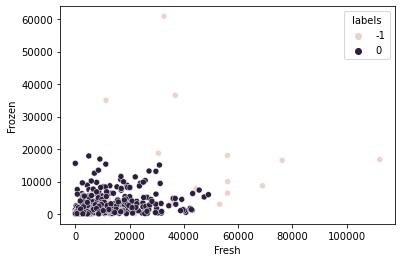

In [21]:
sns.scatterplot(x='Fresh',y='Frozen', hue='labels', data=df)
plt.show()

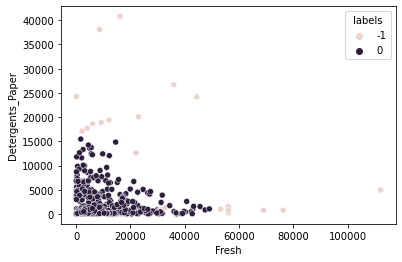

In [22]:
sns.scatterplot(x='Fresh',y='Detergents_Paper', hue='labels', data=df)
plt.show()

Initial Takeaways:
 - We have at least ~10 points that are definite outliers
 - We have some data points that may or may not belong to the main cluster
 - Out of the dimensions we observed, there does not appear to be need for more than one cluster
 - We may want to be less strict about our hyperparemters to catch the data points that arent as extreme as the furthest outliers in the data set

### 2. Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.


In [3]:
# acquire data
file_name = 'anonymized-curriculum-access-07-2021.txt'
col_names = ['date', 'endpoint', 'user_id', 'cohort_id', 'source_ip']

df = pd.read_csv(file_name, sep="\s", header=None, names=col_names, usecols=[0, 2, 3, 4, 5])

In [4]:
df.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018810 entries, 0 to 1018809
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   date       1018810 non-null  object 
 1   endpoint   1018809 non-null  object 
 2   user_id    1018810 non-null  int64  
 3   cohort_id  965313 non-null   float64
 4   source_ip  1018810 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 38.9+ MB


In [6]:
# remove null values
df = df.dropna()

In [7]:
df= df.head(1000)

In [8]:
# select features to examine

selected_feats2 = ['user_id','cohort_id']

In [9]:
# We will create a scaler:
# Make it
# Fit it
# Use it
minmax = MinMaxScaler()

In [10]:
scaled_features2 = minmax.fit_transform(df[selected_feats2])


In [11]:
# examine our numpy array
scaled_features2

array([[0.        , 0.33333333],
       [0.        , 0.33333333],
       [0.        , 0.33333333],
       ...,
       [1.        , 0.95238095],
       [1.        , 0.95238095],
       [1.        , 0.95238095]])

In [12]:
# note: the output of the scaler is already a numpy array
# this is suitable for feeding into our DBSCAN model
type(scaled_features2)

numpy.ndarray

In [13]:
# glue the scaled information back into df:
scaled_cols2 = [col + '_scaled' for col in selected_feats2]

In [14]:
scaled_df2 = pd.DataFrame(scaled_features2, index=df.index, columns=scaled_cols2)
scaled_df2

,user_id_scaled,cohort_id_scaled
0,0.000000,0.333333
1,0.000000,0.333333
2,0.000000,0.333333
3,0.000000,0.333333
4,0.018519,1.000000
...,...,...
1054,0.592593,0.952381
1055,0.592593,0.952381
1056,1.000000,0.952381
1057,1.000000,0.952381


In [15]:
df = df.merge(scaled_df2, on=df.index)

In [16]:
df.head()

,key_0,date,endpoint,user_id,cohort_id,source_ip,user_id_scaled,cohort_id_scaled
0,0,2018-01-26,/,1,8.0,97.105.19.61,0.000000,0.333333
1,1,2018-01-26,java-ii,1,8.0,97.105.19.61,0.000000,0.333333
2,2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61,0.000000,0.333333
3,3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61,0.000000,0.333333
4,4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61,0.018519,1.000000


### Create the DBScan object

- Make it 
- Fit it
- Use it

In [17]:
# check shape of df
df.shape

(1000, 8)

In [18]:
# make the object
dbsc2 = DBSCAN(eps = 0.1, min_samples=20)

In [19]:
# fit it
dbsc2.fit(scaled_features2)


DBSCAN(eps=0.1, min_samples=20)

In [20]:
# use it:
dbsc2.labels_

array([-1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
       -1,  0,  0, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0

In [21]:
# add labels column to df
df['labels'] = dbsc2.labels_

In [22]:
df[selected_feats2 + ['labels']].head()

,user_id,cohort_id,labels
0,1,8.0,-1
1,1,8.0,-1
2,1,8.0,-1
3,1,8.0,-1
4,2,22.0,0


In [23]:
df.labels.value_counts()


 0    899
 1     68
-1     33
Name: labels, dtype: int64

We have our cluster labels now:

Clusters: 2 (label: 0 and 1)

Outliers: (Label: -1)

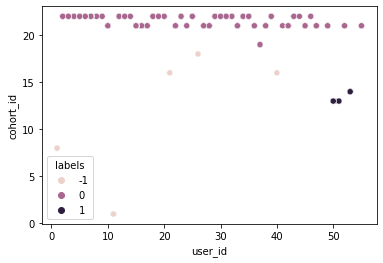

In [24]:
# explore selected features

sns.scatterplot(x='user_id',y='cohort_id', hue='labels', data=df)
plt.show()

Initial Takeaways:
 - There appear to be 3 outliers which are not in either of the 2 clusters
 - the second Cluster is a lot smaller than the first

### 3. Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [2]:
def get_zillow_data(cached=False):
    '''
    This function returns the zillow database as a pandas dataframe. 
    If the data is cached or the file exists in the directory, the function will read the data into a df and return it. 
    Otherwise, the function will read the database into a dataframe, cache it as a csv file
    and return the dataframe.
    '''
    # If the cached parameter is false, or the csv file is not on disk, read from the database into a dataframe
    if cached == False or os.path.isfile('zillow_df.csv') == False:
        sql_query = '''
        SELECT * 
        FROM predictions_2017 pred
        LEFT JOIN properties_2017 USING(parcelid)
        LEFT JOIN airconditioningtype USING(airconditioningtypeid)
        LEFT JOIN architecturalstyletype USING(architecturalstyletypeid)
        LEFT JOIN buildingclasstype USING(buildingclasstypeid)
        LEFT JOIN heatingorsystemtype USING(heatingorsystemtypeid)
        LEFT JOIN propertylandusetype USING(propertylandusetypeid)
        LEFT JOIN storytype USING(storytypeid)
        LEFT JOIN typeconstructiontype USING(typeconstructiontypeid)
        WHERE pred.transactiondate LIKE '2017%'
        AND latitude IS NOT NULL
        AND longitude IS NOT NULL
        AND propertylandusetypeid IN (261, 263, 264, 265, 266, 268, 273, 275, 276, 279);  
        '''
        zillow_df = pd.read_sql(sql_query, get_db_url('zillow'))
        #also cache the data we read from the db, to a file on disk
        zillow_df.to_csv('zillow_df.csv')
    else:
        # either the cached parameter was true, or a file exists on disk. Read that into a df instead of going to the database
        zillow_df = pd.read_csv('zillow_df.csv', index_col=0)
    # return our dataframe regardless of its origin
    return zillow_df

In [3]:
df_z =  get_zillow_data()

In [4]:
df_z.head()

,typeconstructiontypeid,storytypeid,propertylandusetypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,parcelid,id,logerror,...,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,NaN,NaN,261.0,NaN,None,NaN,NaN,14297519,0,0.025595,...,None,NaN,6.059063e+13,None,None,None,None,Single Family Residential,None,None
1,NaN,NaN,261.0,NaN,None,NaN,NaN,17052889,1,0.055619,...,None,NaN,6.111001e+13,None,None,None,None,Single Family Residential,None,None
2,NaN,NaN,261.0,NaN,None,NaN,NaN,14186244,2,0.005383,...,None,NaN,6.059022e+13,None,None,None,None,Single Family Residential,None,None
3,NaN,NaN,261.0,2.0,None,NaN,NaN,12177905,3,-0.103410,...,None,NaN,6.037300e+13,None,None,None,Central,Single Family Residential,None,None
4,NaN,NaN,266.0,2.0,None,NaN,1.0,10887214,4,0.006940,...,None,NaN,6.037124e+13,Central,None,None,Central,Condominium,None,None


In [5]:
df_z = pz.prep_zillow(df_z)

There are no duplicate rows in your dataset.
----------------
The following 34 columns were dropped because they were missing more than 60.0% of data: 
['typeconstructiontypeid', 'storytypeid', 'buildingclasstypeid', 'architecturalstyletypeid', 'airconditioningtypeid', 'basementsqft', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'threequarterbathnbr', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear', 'airconditioningdesc', 'architecturalstyledesc', 'buildingclassdesc', 'storydesc', 'typeconstructiondesc']

167 rows were dropped because they were missing more than 75.0% of data


In [6]:
df_z = df_z.dropna()

In [7]:
df_z = df_z.head(1000)

In [8]:
# select features to examine

selected_feats3 = ['landtaxvaluedollarcnt', 'taxamount']

In [9]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 3 to 1721
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         1000 non-null   float64
 1   heatingorsystemtypeid         1000 non-null   float64
 2   parcelid                      1000 non-null   int64  
 3   id                            1000 non-null   int64  
 4   logerror                      1000 non-null   float64
 5   transactiondate               1000 non-null   object 
 6   bathroomcnt                   1000 non-null   float64
 7   bedroomcnt                    1000 non-null   float64
 8   buildingqualitytypeid         1000 non-null   float64
 9   calculatedbathnbr             1000 non-null   float64
 10  calculatedfinishedsquarefeet  1000 non-null   float64
 11  finishedsquarefeet12          1000 non-null   float64
 12  fips                          1000 non-null   float64
 13  ful

In [10]:
# We will create a scaler:
# Make it
# Fit it
# Use it
minmax = MinMaxScaler()

In [11]:
# use scaler
scaled_features3 = minmax.fit_transform(df_z[selected_feats3])


In [12]:
# examine our numpy array
scaled_features3

array([[0.0061295 , 0.02067486],
       [0.00780556, 0.01759974],
       [0.087347  , 0.11835827],
       ...,
       [0.00203611, 0.00313256],
       [0.02967565, 0.03800334],
       [0.01949686, 0.02385122]])

In [13]:
# note: the output of the scaler is already a numpy array
# this is suitable for feeding into our DBSCAN model
type(scaled_features3)

numpy.ndarray

In [14]:
# glue the scaled information back into df:
scaled_cols3 = [col + '_scaled' for col in selected_feats3]

In [15]:
scaled_df3 = pd.DataFrame(scaled_features3, index=df_z.index, columns=scaled_cols3)
scaled_df3

,landtaxvaluedollarcnt_scaled,taxamount_scaled
3,0.006129,0.020675
4,0.007806,0.017600
6,0.087347,0.118358
8,0.007335,0.037421
9,0.038559,0.055763
...,...,...
1714,0.012855,0.038250
1715,0.036440,0.064702
1717,0.002036,0.003133
1719,0.029676,0.038003


In [16]:
df_z = df_z.merge(scaled_df3, on=df_z.index)

In [17]:
df_z.head()

,key_0,propertylandusetypeid,heatingorsystemtypeid,parcelid,id,logerror,transactiondate,bathroomcnt,bedroomcnt,buildingqualitytypeid,...,taxamount,censustractandblock,heatingorsystemdesc,propertylandusedesc,age_of_home,LA_county,orange_county,ventura_county,landtaxvaluedollarcnt_scaled,taxamount_scaled
0,3,261.0,2.0,12177905,3,-0.103410,2017-01-01,3.0,4.0,8.0,...,1777.51,6.037300e+13,Central,Single Family Residential,51,1,0,0,0.006129,0.020675
1,4,266.0,2.0,10887214,4,0.006940,2017-01-01,3.0,3.0,8.0,...,1533.89,6.037124e+13,Central,Condominium,57,1,0,0,0.007806,0.017600
2,6,261.0,2.0,12095076,6,-0.001011,2017-01-01,3.0,4.0,9.0,...,9516.26,6.037461e+13,Central,Single Family Residential,71,1,0,0,0.087347,0.118358
3,8,261.0,2.0,12790562,8,-0.040966,2017-01-02,3.0,4.0,9.0,...,3104.19,6.037500e+13,Central,Single Family Residential,51,1,0,0,0.007335,0.037421
4,9,266.0,2.0,11542646,9,-0.036763,2017-01-02,3.0,2.0,8.0,...,4557.32,6.037275e+13,Central,Condominium,41,1,0,0,0.038559,0.055763


In [18]:
# make dbscan object
dbsc3 = DBSCAN(eps = 0.1, min_samples=20)

In [19]:
# fit it
dbsc3.fit(scaled_features3)

DBSCAN(eps=0.1, min_samples=20)

In [20]:
# use it:
dbsc3.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [21]:
# add labels column to df
df_z['labels'] = dbsc3.labels_

In [22]:
df_z[selected_feats3 + ['labels']].head()

,landtaxvaluedollarcnt,taxamount,labels
0,36225.0,1777.51,0
1,45726.0,1533.89,0
2,496619.0,9516.26,0
3,43056.0,3104.19,0
4,220058.0,4557.32,0


In [24]:
df_z.labels.value_counts()


 0    988
-1     12
Name: labels, dtype: int64

We have our cluster labels now:
- Clusters: 1 (label: 0)
- Outliers: (Label: -1)

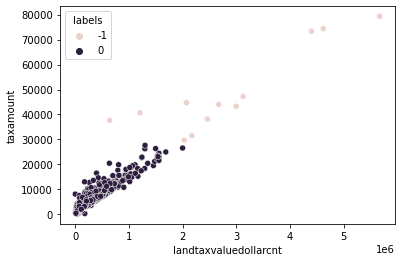

In [25]:
sns.scatterplot(x='landtaxvaluedollarcnt', y='taxamount', hue='labels', data=df_z)
plt.show()

### Takeaways
- Looks like a positive correlation
- about 6 definite outliers
- some other points may or may not belong to main cluster